In [2]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from textblob import Word

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df1 = pd.read_csv(r'C:\Users\Sonu\Downloads\assignment_train.csv')

In [6]:
df1.shape

(250087, 3)

In [7]:
df2 = pd.read_csv(r'C:\Users\Sonu\Downloads\assignment_test.csv')

In [8]:
df2.shape

(125042, 3)

In [9]:
merged_data=[df1,df2]

In [10]:
#Merging the training and test dataset to form a new dataset "data" using concat function
data=pd.concat(merged_data)

In [11]:
data.shape

(375129, 3)

In [12]:
data.head()

,0,1,2
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love


In [13]:
#Renaming columns as 'Serial No','Text','Emotion'
data.columns=['ID','Text','Emotion']

In [14]:
data.head()

,ID,Text,Emotion
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love


In [15]:
#Counting the frequencies for each emotion
data.Emotion.value_counts()

joy         126839
sadness     109316
anger        51562
fear         42879
love         31032
surprise     13501
Name: Emotion, dtype: int64

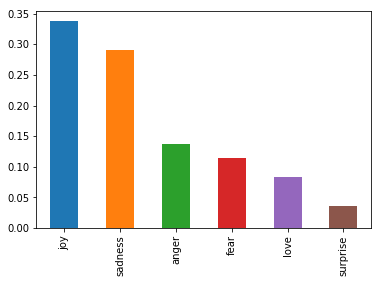

In [16]:
#Plotting the Emotion output as a bar graph for percentage visualisation
(data['Emotion'].value_counts()/len(data)).plot.bar()

In [17]:
#To check with missing/Nan values
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

In [18]:
#Converting to lower case
data['Text']=data['Text'].str.lower()

In [19]:
#Removing the not required characters other than alpha numeric and space
data['Text']=data['Text'].str.replace('[^A-Za-z0-9\s]+', '')

In [20]:
#Removing stopwords
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [21]:
#Lemmatization
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [22]:
#Assigning target variable
target=data.Emotion
data = data.drop(['Emotion'],axis=1)

In [23]:
#Label Encoding target variable
le=LabelEncoder()
target=le.fit_transform(target)

In [24]:
#Splitting dataset into train and test using 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(data,target,stratify=target,test_size=0.3, random_state=40)

In [25]:
#Extracting count vectorizer parameters
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['Text'])
X_train_count =  count_vect.transform(X_train.Text)
X_test_count =  count_vect.transform(X_test.Text)

In [26]:
#Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred = nb.predict(X_test_count)
print('naive bayes count accuracy %s' % accuracy_score(y_pred, y_test))

naive bayes count accuracy 0.8629097468433166


In [27]:
#Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train_count, y_train)
y_pred = lr.predict(X_test_count)
print('Logistic Regression count accuracy %s' % accuracy_score(y_pred, y_test))

Logistic Regression count accuracy 0.8927216342778947


In [73]:
#XG Boost Model
xg = XGBClassifier()
xg.fit(X_train_count, y_train)
y_pred = xg.predict(X_test_count)
print('XG Boost count accuracy %s' % accuracy_score(y_pred, y_test))

XG Boost count accuracy 0.8034636881436658


In [16]:
#RandomForest Classifier Model
rf = RandomForestClassifier()
rf.fit(X_train_count, y_train)
y_pred = rf.predict(X_test_count)
print('RF Classifier count accuracy %s' % accuracy_score(y_pred, y_test))

RF Classifier count accuracy 0.8531531291374546
